In [1]:
from new_predict import segment_result
import tifffile as tiff
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

/home/ashok/anaconda/envs/conda_kr2/lib/python3.6/site-packages/tifffile/tifffile.py:8211: UserWarning: module compiled against API version 0xc but this version of numpy is 0xb
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))
Using TensorFlow backend.


In [2]:
def calculate_differnce(img1, img2):
    im1 = Image.open(img1)
    im2 = Image.open(img2)
    
    pix_val1 = list(im1.getdata())
    pix_val2 = list(im2.getdata())
    
    len_1 = len(pix_val1)
    len_2 = len(pix_val2)
    
    green_pix = (34, 139, 34)
    blue_pix = (0, 255, 255)
    
    green1 = green2 = 0
    blue1 = blue2 = 0
    
    if len_1 == len_2:
        print("===Ok===")
        for i in range(len_1):
            if pix_val1[i] == green_pix:
                green1 +=1
            elif pix_val1[i] == blue_pix:
                blue1 +=1
            if pix_val2[i] == green_pix:
                green2 +=1
            elif pix_val2[i] == blue_pix:
                blue2 +=1
    else:
        print("size not matched")
    
    return green1, green2, blue1, blue2

In [3]:
def percentage(a1,a2):
    return (100 - ((a2/a1) *100))

In [4]:
def result(data_list):
    tree1 = data_list[0]
    tree2 = data_list[1]
    
    water1 = data_list[2]
    water2 = data_list[3]
    
    # for forest data calculation.....................
    if data_list[0] == 0 and data_list[1] == 0:
        print("=============No Forest Data==============")
    elif data_list[0] == 0 and data_list[1] != 0:
        print("=========No Change in Forest Data============")
    elif data_list[0] != 0 and data_list[1] == 0:
        print("=========No Change in Forest Data============")
        
     
    elif data_list[0] > data_list[1]:
        print("=============Forest Data==============")
        total_loss = percentage(tree1,tree2)
        print(".........Forest Decreased By...........")
        print(total_loss)
    elif data_list[0] < data_list[1]:
        print("=============Forest Data==============")
        total_loss = percentage(tree2,tree1)
        print(".........Forest Increased By...........")
        print(total_loss)
    else:
        print("=============Forest Data==============")
        print(".........Neither Increased or Decreased...........")
        total_loss = percentage(tree2,tree1)
        print(total_loss)
    
    # for Water data calculation.....................
    
    if data_list[2] == 0 and data_list[3] == 0:
        print("=============No Water Data==============")
    elif data_list[2] == 0 and data_list[3] != 0:
        print("=========No Change in Water Data============")
    elif data_list[2] != 0 and data_list[2] == 0:
        print("=========No Change in Water Data============")
    
    elif data_list[2] > data_list[3]:
        print("=============Water Data==============")
        total_loss = percentage(water1,water2)
        print(".........Water Decreased By...........")
        print(total_loss)
    elif data_list[2] < data_list[3]:
        print("=============Water Data==============")
        total_loss = percentage(water2,water1)
        print(".........Water Increased By...........")
        print(total_loss)
    else:
        print("=============Water Data==============")
        print(".........Neither Increased or Decreased...........")
        total_loss = percentage(water2,water1)
        print(total_loss)
    
    

In [5]:
# path to satelite image M-Band
path = 'data/test_set/test/'

In [6]:
li_org = [os.path.join(path,i) for i in os.listdir(path)]

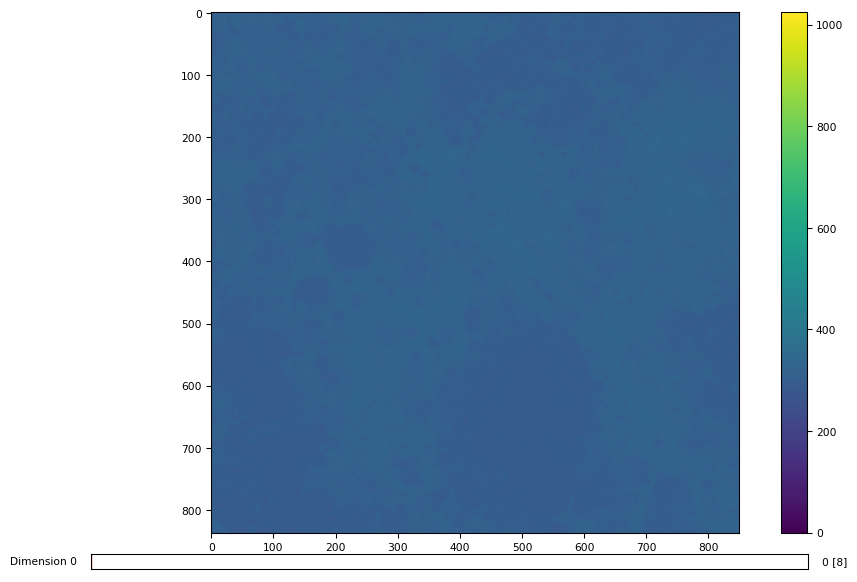

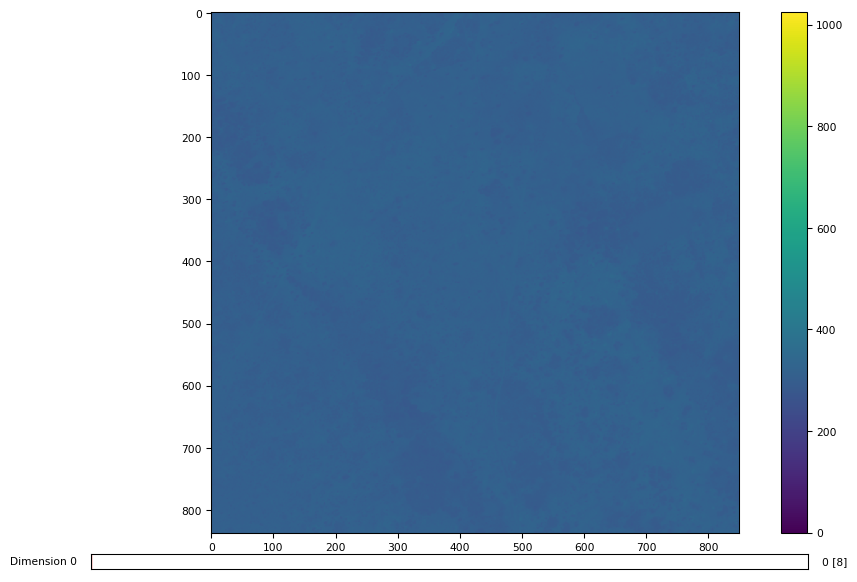

In [7]:
for i in li_org:
    img = tiff.imread(i)
    tiff.imshow(img)

In [8]:
# segmentation of satelite image
segment_result(path)

test3.tif
================ mat ===================
0.0223833 4.97403e-07
Case 1 (837, 849, 8) (5, 837, 849)
================ mat ===================
0.0165991 1.28186e-08
Case 2 (5, 837, 849) (5, 837, 849)
================ mat ===================
0.013614 1.0442e-07
Case 3 (5, 849, 837) (5, 837, 849)
================ mat ===================
0.0196903 8.47758e-09
Case 4 (849, 837, 5) (5, 837, 849)
================ mat ===================
0.0377642 1.58709e-09
Case 5 (837, 849, 5) (5, 837, 849)
================ mat ===================
0.0192557 4.61681e-07
Case 6 (849, 837, 5) (5, 837, 849)
================ mat ===================
0.0177661 2.17235e-07
Case 7 (5, 837, 849) (5, 837, 849)
0.009801 4.6196e-07
test2.tif
================ mat ===================
0.0111406 4.13324e-09
Case 1 (837, 849, 8) (5, 837, 849)
================ mat ===================
0.0259691 8.94957e-06
Case 2 (5, 837, 849) (5, 837, 849)
================ mat ===================
0.0164795 4.68988e-09
Case 3 (5, 849, 8

In [9]:
#path of sengmented image 
path_seg = 'data/test_set/test_map/'

In [10]:
li_seg = [os.path.join(path_seg,i) for i in os.listdir(path_seg)]

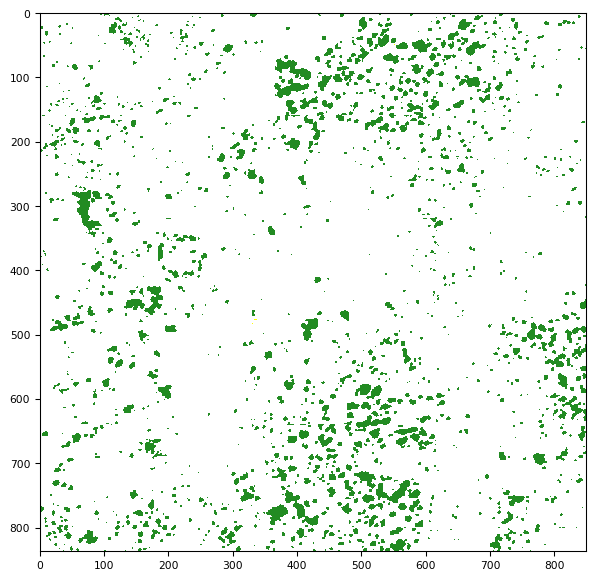

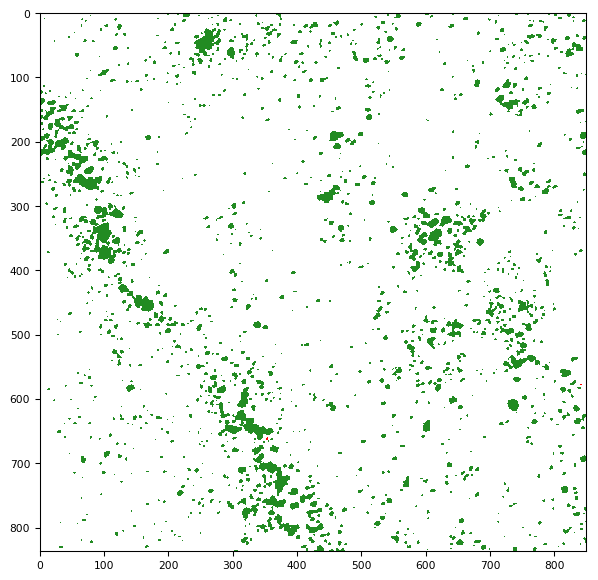

In [11]:
for i in li_seg:
    img = tiff.imread(i)
    tiff.imshow(img)

In [12]:
path_to_seg_img1 = li_seg[0]
path_to_seg_img2 = li_seg[1]

In [13]:
data_list = calculate_differnce(path_to_seg_img1,path_to_seg_img2)

===Ok===


In [14]:
data_list

(60557, 47913, 0, 0)

In [15]:
result(data_list)

=============Forest Data==============
.........Forest Decreased By...........
20.879501956834062
=============No Water Data==============
